# Image Background Transparency Processor

This project provides a Python script that processes an image to make its background transparent. The script utilizes OpenCV for image processing and Matplotlib for visual comparison of the original and processed images.

## Key Features:
- **Image Reading**: The script reads an image from a specified file path.
- **Grayscale Conversion**: Converts the image to grayscale to simplify processing.
- **Binary Thresholding**: Applies a threshold to create a binary image, isolating the subject from the background.
- **Contour Detection**: Finds and selects the largest contour in the image to identify the main subject.
- **Mask Creation**: Generates a mask to outline the subject, which will be used to make the background transparent.
- **RGBA Conversion**: Converts the image to include an alpha channel, setting the background to transparent.
- **Saving and Plotting**: Saves the processed image with transparency and displays a side-by-side comparison using Matplotlib.



Processed image saved with a transparent background to final_image.png


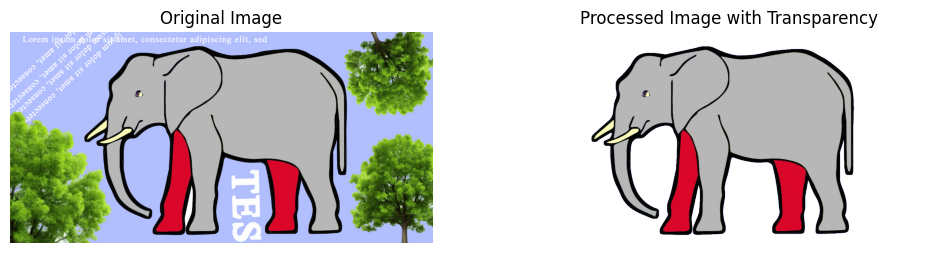

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to process the image, make the background transparent, and save the result
def process_image(input_path, output_path):
    # Read the input image from the given file path
    img = cv2.imread(input_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {input_path}")

    # Convert the image to grayscale for easier processing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a binary inverse threshold to create a binary image
    _, thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        # Select the largest contour based on area
        cont = sorted(contours, key=cv2.contourArea)[-1]

        # Create a mask with the same dimensions as the grayscale image
        mask = np.zeros_like(gray)
        # Draw the largest contour on the mask
        cv2.drawContours(mask, [cont], -1, (255, 255, 255), -1)

        # Convert the original image to an RGBA image (adding an alpha channel)
        rgba = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
        # Set the alpha channel to the mask, making the background transparent
        rgba[:, :, 3] = mask

        # Save the processed image with transparency to the given output path
        cv2.imwrite(output_path, rgba)
        print(f"Processed image saved with a transparent background to {output_path}")
        
        # Convert images to the correct color format for displaying in Matplotlib
        original_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        processed_img_rgb = cv2.cvtColor(rgba, cv2.COLOR_BGRA2RGBA)
        
        # Create a side-by-side comparison of the original and processed images
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        axs[0].imshow(original_img_rgb)
        axs[0].set_title('Original Image')
        axs[0].axis('off')
        
        axs[1].imshow(processed_img_rgb)
        axs[1].set_title('Processed Image with Transparency')
        axs[1].axis('off')
        
        # Display the comparison
        plt.show()

    else:
        print("No contours found in the image.")

input_image = 'img10.jpg'
output_image = 'final_image.png'
process_image(input_image, output_image)
